importing dependincies

In [ ]:
import numpy as np  # for numpy arrays
import pandas as pd  #for dataframes/data manupulation and representation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns
from sklearn.cluster import KMeans  # k means library
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


data collection and analysis

In [ ]:
#loading the data from csv file to pandas dataframe
customer_data = pd.read_csv('/content/exp.csv' ,names=['CustomerID','Gender','Age','Annual_Income','Spending_Score','Ware_Pin','Customer_Pin','Zone'], header=0, encoding='utf-8')

In [ ]:
# first five rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Ware_Pin,Customer_Pin,Zone
0,1,Male,19,15,39,121003,507101,d
1,2,Male,21,15,81,121003,486886,d
2,3,Female,20,16,6,121003,532484,d
3,4,Female,23,16,77,121003,143001,b
4,5,Female,31,17,40,121003,515591,d


In [ ]:
# finding the number of rows and columns
customer_data.shape

(124, 8)

In [ ]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      124 non-null    int64 
 1   Gender          124 non-null    object
 2   Age             124 non-null    int64 
 3   Annual_Income   124 non-null    int64 
 4   Spending_Score  124 non-null    int64 
 5   Ware_Pin        124 non-null    int64 
 6   Customer_Pin    124 non-null    int64 
 7   Zone            124 non-null    object
dtypes: int64(6), object(2)
memory usage: 7.9+ KB


In [ ]:
#checking for missing values
customer_data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Ware_Pin          0
Customer_Pin      0
Zone              0
dtype: int64

FOR PIN CODE VS SPENDING SCORE

In [ ]:
X = customer_data.iloc[:,[4,6]].values #splicing the data , taking only the 3rd and 4th column

In [ ]:
print(X)

[[    39 507101]
 [    81 486886]
 [     6 532484]
 [    77 143001]
 [    40 515591]
 [    76 326502]
 [     6 208019]
 [    94 140301]
 [     3 396001]
 [    72 711106]
 [    14 284001]
 [    99 441601]
 [    15 248006]
 [    77 485001]
 [    13 845438]
 [    79 463106]
 [    35 140301]
 [    66 495671]
 [    29 673002]
 [    98 208002]
 [    35 416010]
 [    73 226010]
 [     5 400705]
 [    73 262405]
 [    14 394210]
 [    82 411014]
 [    32 783301]
 [    61 486661]
 [    31 244001]
 [    87 492001]
 [     4 517128]
 [    73 562110]
 [     4 831006]
 [    92 140604]
 [    14 723146]
 [    81 421204]
 [    17 263139]
 [    73 743263]
 [    26 392150]
 [    75 382830]
 [    35 711303]
 [    92 283102]
 [    36 370201]
 [    61 248001]
 [    28 144001]
 [    65 403401]
 [    55 452001]
 [    47 721636]
 [    42 831002]
 [    42 226004]
 [    52 248001]
 [    60 410206]
 [    54 516503]
 [    60 742103]
 [    45 452018]
 [    41 208001]
 [    50 244713]
 [    46 580007]
 [    51 36000

CALCULATING AND VISUALIZING SILHOUTTE VALUE FOR EACH POSSIBLE NUMBER OF CLUSTERS (DO NOT CHANGE ANYTHING IN THIS CODE)

For n_clusters = 2 The average silhouette_score is : 0.7051708416017349
For n_clusters = 3 The average silhouette_score is : 0.6595557835052082
For n_clusters = 4 The average silhouette_score is : 0.6918601183884051
For n_clusters = 5 The average silhouette_score is : 0.6936287837961752
For n_clusters = 6 The average silhouette_score is : 0.6922766282170691


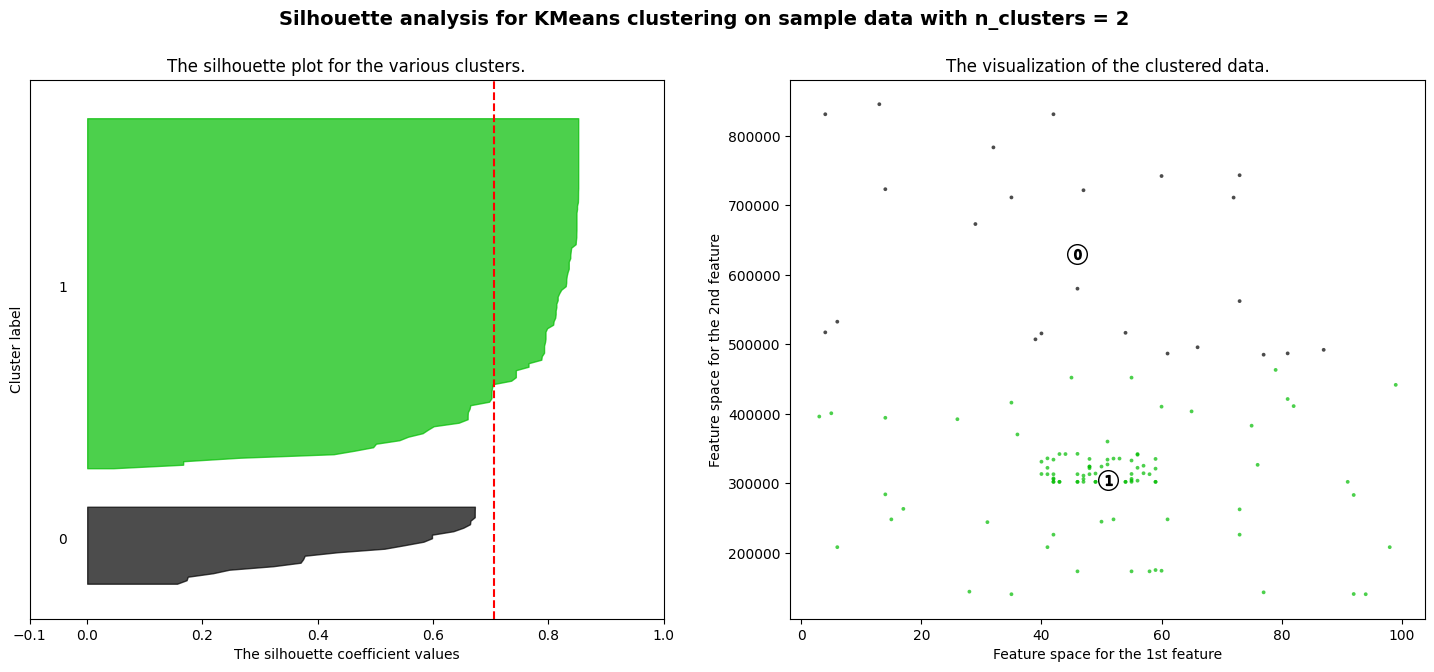

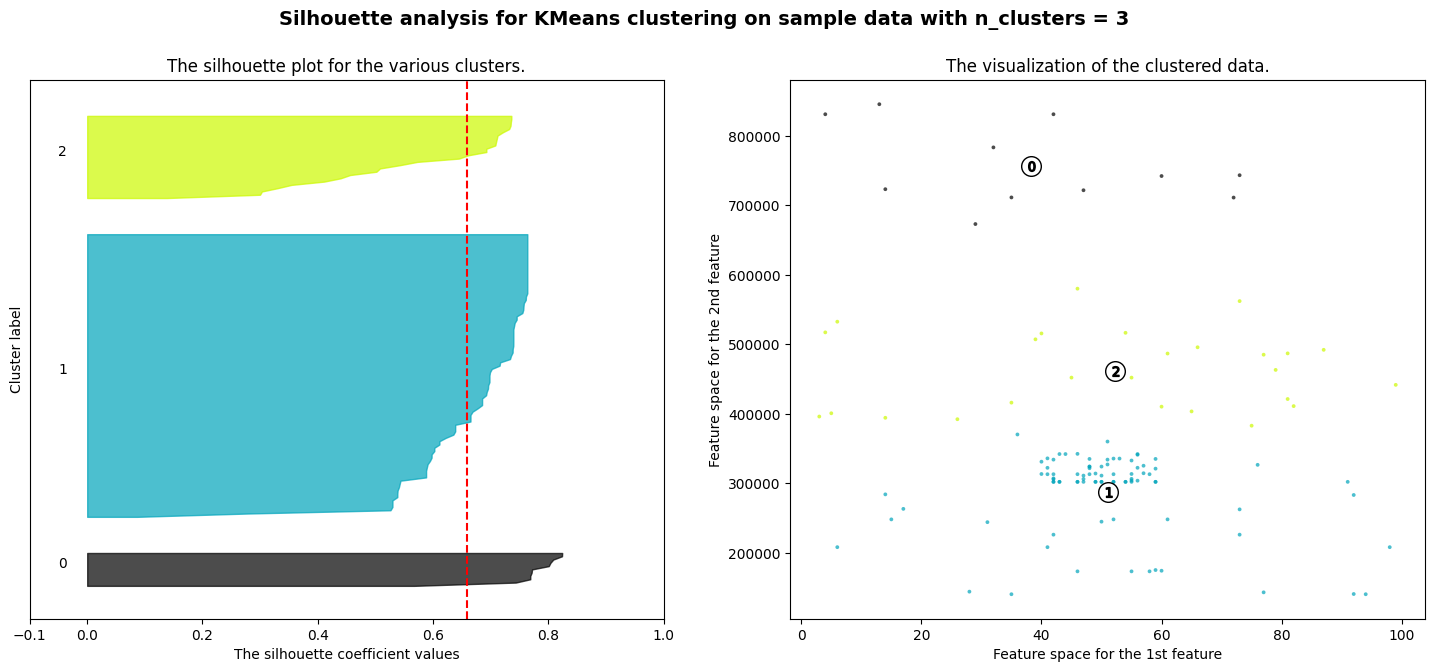

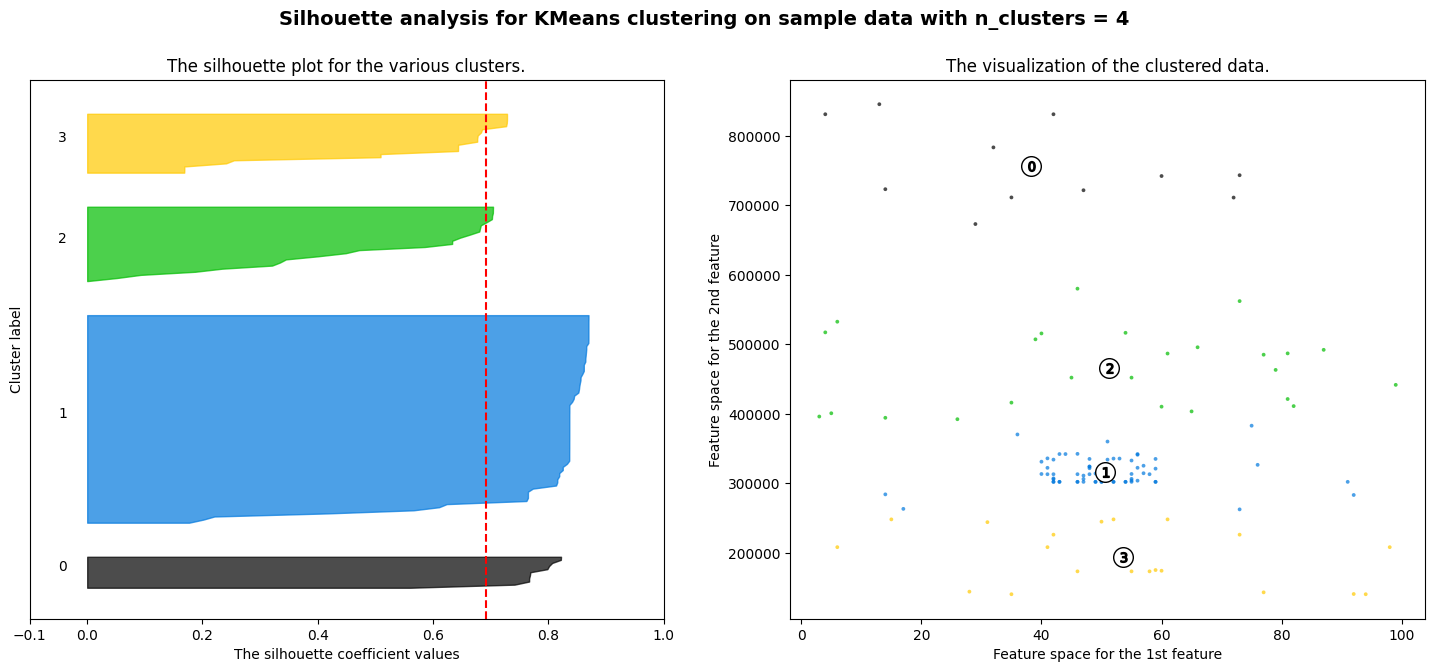

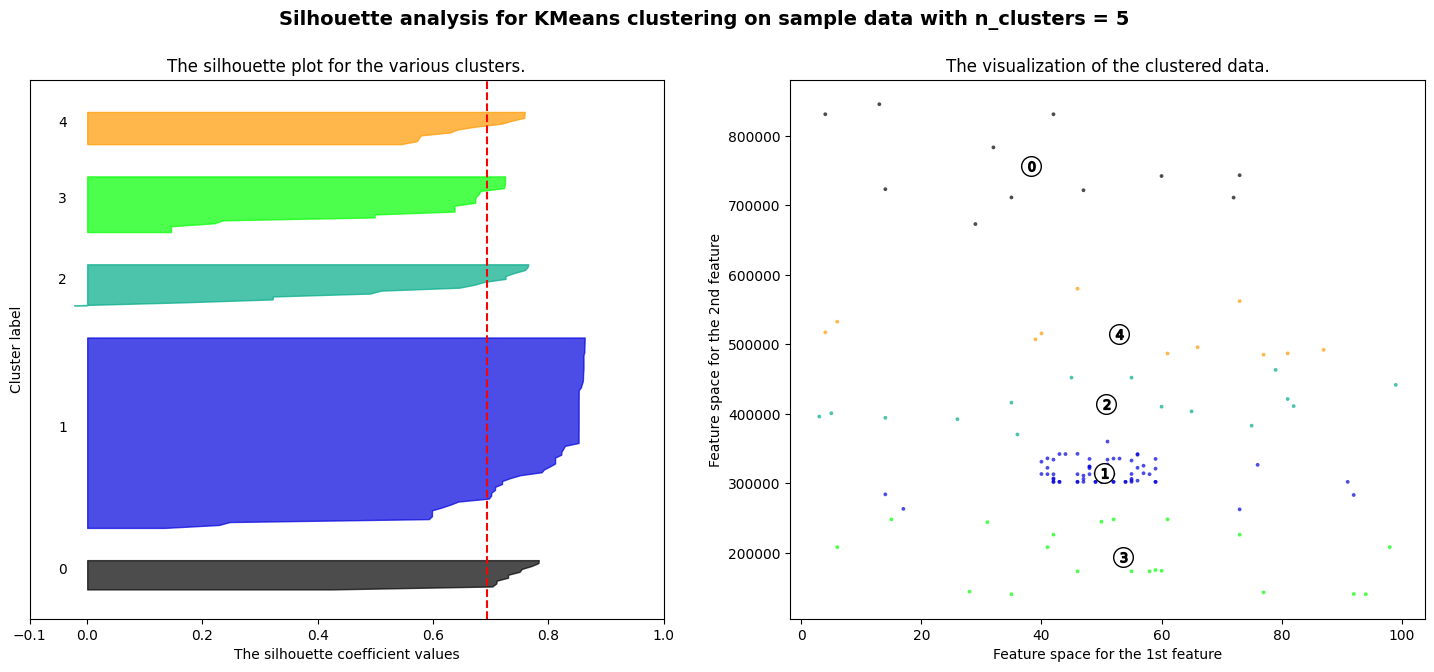

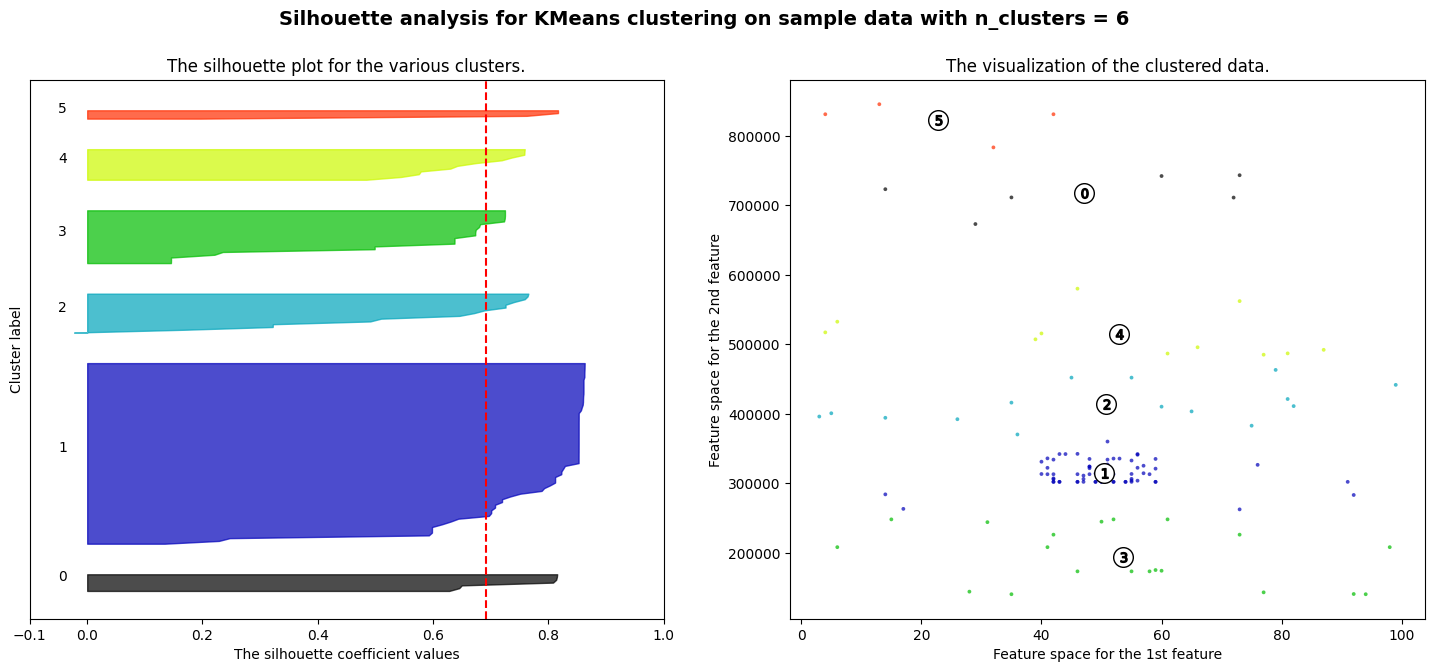

In [ ]:

# set the number of clusters to test
range_n_clusters = [2, 3, 4, 5, 6]

# perform silhouette analysis for each cluster value
for n_clusters in range_n_clusters:
    # create subplots for silhouette plot and cluster visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # set the range for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize the KMeans clusterer with the current number of clusters
    clusterer = KMeans(n_clusters=n_clusters,n_init="auto",random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # compute the silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette values for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # choose a color for the current cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # update the y_lower value for the next cluster
        y_lower = y_upper + 10  # 10 for the 0 samples

    # add labels and title for the silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # add a vertical line for the average silhouette score
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear yaxis labels/ticks for better visualization
    ax1.set_yticks([])

    # set the xaxis ticks for the silhouette plot
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


To choose the correct number of clusters

WCSS-> within sum of squares   

(EKHANEO NO CHANGE)

In [ ]:
#elbow method for finding wcss value for different number of clusters

wcss = []
silhouette_scores = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_) #inertia function lies within the kmeans algorith and gives us the wcss values
  silhouette_scores.append(silhouette_score(X, kmeans.labels_))# Calculate the silhouette score for the current number of clusters

Plotting an elbow and silhouette score graph

(no change here )

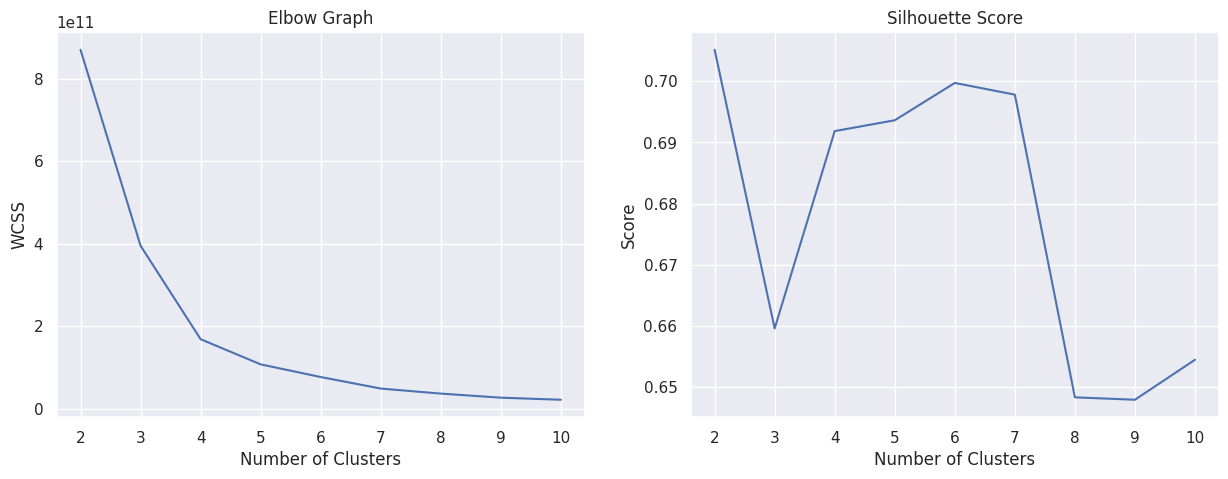

In [ ]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(range(2,11),wcss)
ax[0].set_title('Elbow Graph')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('WCSS')

ax[1].plot(range(2,11), silhouette_scores)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')

plt.show()

Optimum number of clusters = n (EKHANE VALUE CHANGE KORBI AFTER ANALYSING ALL THE ABOVE GRAPHS)

n_clusters er value oh change korbi tokhon

training the k means model

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++',random_state=0)

#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)   #returns a cluster number for each of the data points

print(Y)

[4 4 4 0 4 3 5 0 1 2 3 1 5 4 2 1 0 4 2 5 1 5 1 5 1 1 2 4 5 4 4 4 2 0 2 1 5
 2 1 1 2 3 1 5 0 1 1 2 2 5 5 1 4 2 1 5 5 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 3]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


visualising the clusters


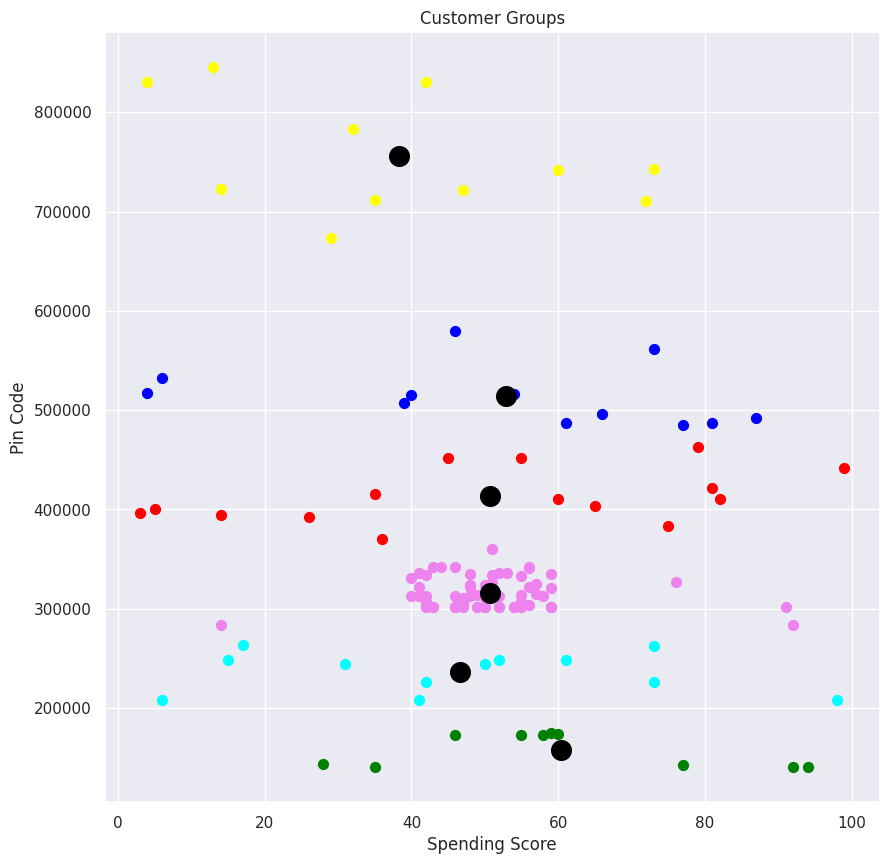

In [ ]:
#plotting all the clusters and their centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='cyan', label='Cluster 6')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Spending Score')
plt.ylabel('Pin Code')
plt.show()

Adding a new column called clusters to the dataframe

In [ ]:
# Create data arrays
cluster_centers = kmeans.cluster_centers_
data = np.expm1(cluster_centers)  # NumPy expm1 function returns the exponential value of minus one for each element given inside a NumPy array as output. Therefore, the np.expm1 method accepts arr_name and out arguments and then returns the array as outputs.
points = np.append(data, cluster_centers, axis=1)
points

<ipython-input-15-900634b5444b>:3: RuntimeWarning: overflow encountered in expm1
  data = np.expm1(cluster_centers)  # NumPy expm1 function returns the exponential value of minus one for each element given inside a NumPy array as output. Therefore, the np.expm1 method accepts arr_name and out arguments and then returns the array as outputs.


array([[1.70367483e+26,            inf, 6.04000000e+01, 1.57704700e+05],
       [1.00984275e+22,            inf, 5.06666667e+01, 4.13777200e+05],
       [4.18441030e+16,            inf, 3.82727273e+01, 7.56027818e+05],
       [9.99378148e+21,            inf, 5.06562500e+01, 3.15766625e+05],
       [8.81505705e+22,            inf, 5.28333333e+01, 5.14762000e+05],
       [1.70170633e+20,            inf, 4.65833333e+01, 2.36191833e+05]])

In [ ]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2],[3],[4],[5]], axis=1)
customer_data["clusters"] = kmeans.labels_

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Ware_Pin,Customer_Pin,Zone,clusters
0,1,Male,19,15,39,121003,507101,d,4
1,2,Male,21,15,81,121003,486886,d,4
2,3,Female,20,16,6,121003,532484,d,4
3,4,Female,23,16,77,121003,143001,b,0
4,5,Female,31,17,40,121003,515591,d,4


BAR GRAPH for no of elements in each clusters

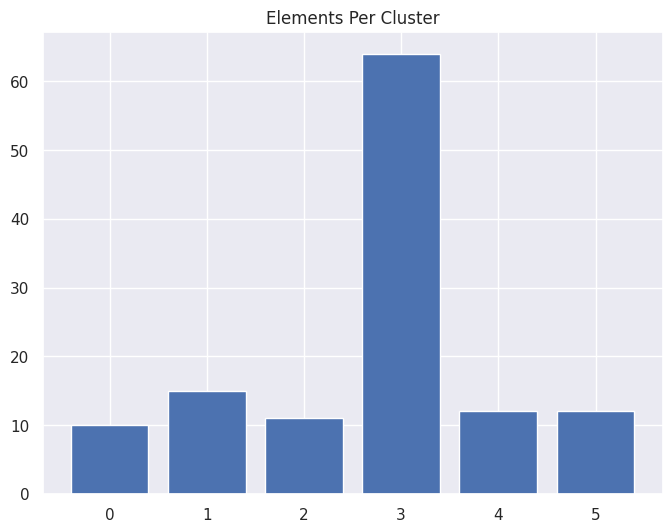

In [ ]:
valcount = customer_data.clusters.value_counts()
plt.figure(figsize=(8,6))
plt.bar(valcount.index,valcount.values)
176
plt.title('Elements Per Cluster')
plt.show()